In [90]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

In [91]:
from google.analytics.data_v1beta import BetaAnalyticsDataClient
from google.analytics.data_v1beta.types import DateRange
from google.analytics.data_v1beta.types import Dimension
from google.analytics.data_v1beta.types import Metric
from google.analytics.data_v1beta.types import RunReportRequest
from google.analytics.data_v1beta.types import OrderBy

In [92]:
## Set up global variables

os.environ["GOOGLE_APPLICATION_CREDENTIALS"] = 'google_analytics_api_access_keys.json'
property_id = 'GA4_property_id'

client = BetaAnalyticsDataClient()

In [93]:
## Format Report - run_report method
def format_report(request):
    response = client.run_report(request)
    
    # Row index
    row_index_names = [header.name for header in response.dimension_headers]
    row_header = []
    for i in range(len(row_index_names)):
        row_header.append([row.dimension_values[i].value for row in response.rows])

    row_index_named = pd.MultiIndex.from_arrays(np.array(row_header), names = np.array(row_index_names))
    # Row flat data
    metric_names = [header.name for header in response.metric_headers]
    data_values = []
    for i in range(len(metric_names)):
        data_values.append([row.metric_values[i].value for row in response.rows])

    output = pd.DataFrame(data = np.transpose(np.array(data_values, dtype = 'f')), 
                          index = row_index_named, columns = metric_names)
    return output

In [94]:
request = RunReportRequest(
    property='properties/' + property_id,
    dimensions=[
        Dimension(name="month"),
        Dimension(name="firstUserSourceMedium"),
        Dimension(name="adSourceName"),
        Dimension(name="browser"),
        Dimension(name="campaignId"),
        Dimension(name="campaignName"),
        Dimension(name="city"),
        #Dimension(name="country"),
        Dimension(name="date"),
        Dimension(name="deviceCategory"),
        #Dimension(name="searchTerm")
    ],
    metrics=[
        #Metric(name="averageSessionDuration"),
        Metric(name="activeUsers"),
        Metric(name="totalRevenue"),
        Metric(name="cartToViewRate"),
        Metric(name="conversions"),
        Metric(name="engagedSessions"),
        Metric(name="sessionConversionRate"),
        Metric(name="sessions"),
        Metric(name="userConversionRate"),
        Metric(name="totalAdRevenue")
    ],
    order_bys=[
        OrderBy(dimension={'dimension_name': 'month'}),
        OrderBy(dimension={'dimension_name': 'firstUserSourceMedium'})
    ],
    date_ranges=[DateRange(start_date="2023-06-10", end_date="today")]
)


In [95]:
pd.options.display.max_rows
pd.set_option('display.max_rows', None)
format_report(request)


activeUsers  \
month firstUserSourceMedium adSourceName browser         campaignId  campaignName                                       city       date     deviceCategory                
06    Facebook / CPC        (not set)    Android Webview (not set)   (not set)                                          Chennai    20230630 mobile                924.0   
                                                                                                                        Coimbatore 20230630 mobile                369.0   
                                                                                                                        Bengaluru  20230630 mobile                312.0   
                                                                     Chennai_4w_PMS_May'23_PN                           Chennai    20230630 mobile                298.0   
                                                                     myTVS-2|Chennai|4w|PMS|June'23                     Chennai    20230630 mobile                153.0   
                                                                     Bangalore_4w_PMS_2999_PN_May'23_Apr'23             Bengaluru  20230630 mobile                147.0   
                                                                     Bangalore_4w_PMS_2999_Feb'23                       Bengaluru  20230630 mobile                106.0   
                                                                     Chennai_4w_AC_May'23_PN                            Chennai    20230630 mobile                103.0   
                                                                     myTVS-1|Chennai|4w|All Service|June'23             Chennai    20230630 mobile                 86.0   
                                                                     Coimbatore | 4w | AC 1199 | Online Interest May'23 Coimbatore 20230630 mobile                 82.0   
                                                                     (not set)                                          Indore     20230630 mobile                 80.0   
                                         Safari (in-app) (not set)   (not set)                                          Chennai    20230630 mobile                 80.0   
                                         Android Webview (not set)   (not set)                                          Hyderabad  20230630 mobile                 74.0   
                                                                                                                        Chennai    20230629 mobile                 55.0   
                                                                     Chennai_4w_All_Service_May'23_PN                   Chennai    20230630 mobile                 55.0   
                                                                     bangalore_4w_Exp_1199_May'23                       Bengaluru  20230630 mobile                 51.0   
                                                                     {{campaign.name}}                                  Coimbatore 20230630 mobile                 42.0   
                                                                     Cbe_4w_PMS_2999_June'23                            Coimbatore 20230630 mobile                 41.0   
                                         Safari (in-app) (not set)   (not set)                                          Bengaluru  20230630 mobile                 41.0   
                                         Android Webview (not set)   Cbe_4w_All_Broad_1199_June'23                      Coimbatore 20230630 mobile                 40.0   
                                                                     Chennai_4w_Repair_Job_May'23_PN                    Chennai    20230630 mobile                 37.0   
                                                                     Coimbatore | 4w | AC 1199 | Online Interest May'23 Chennai    20230630 mobile                 37.0   
      facebook / CPC        (not set)    Android Web

C:\Users\HP\AppData\Local\Temp\ipykernel_2872\3596055205.py:8: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


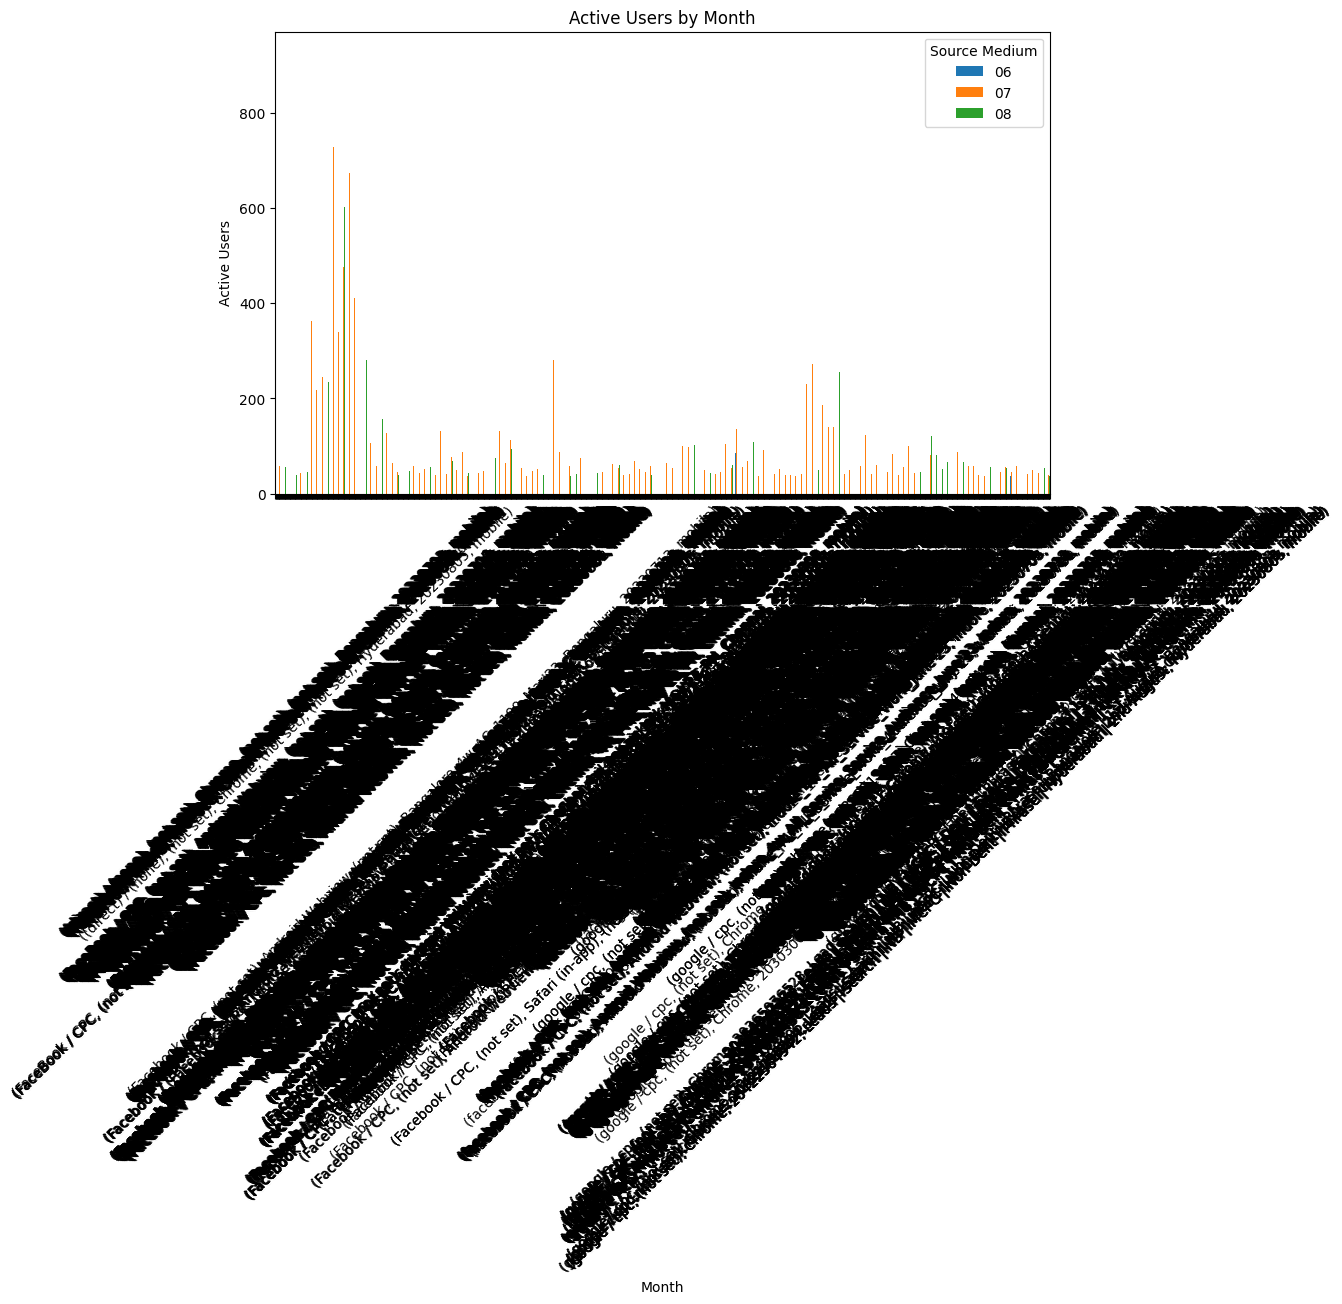

In [98]:
output_df = format_report(request)
output_df['activeUsers'].unstack('month').plot(kind='bar', figsize=(10, 6))
plt.title('Active Users by Month')
plt.xlabel('Month')
plt.ylabel('Active Users')
plt.xticks(rotation=45)
plt.legend(title='Source Medium', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_2872\1342365969.py:8: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


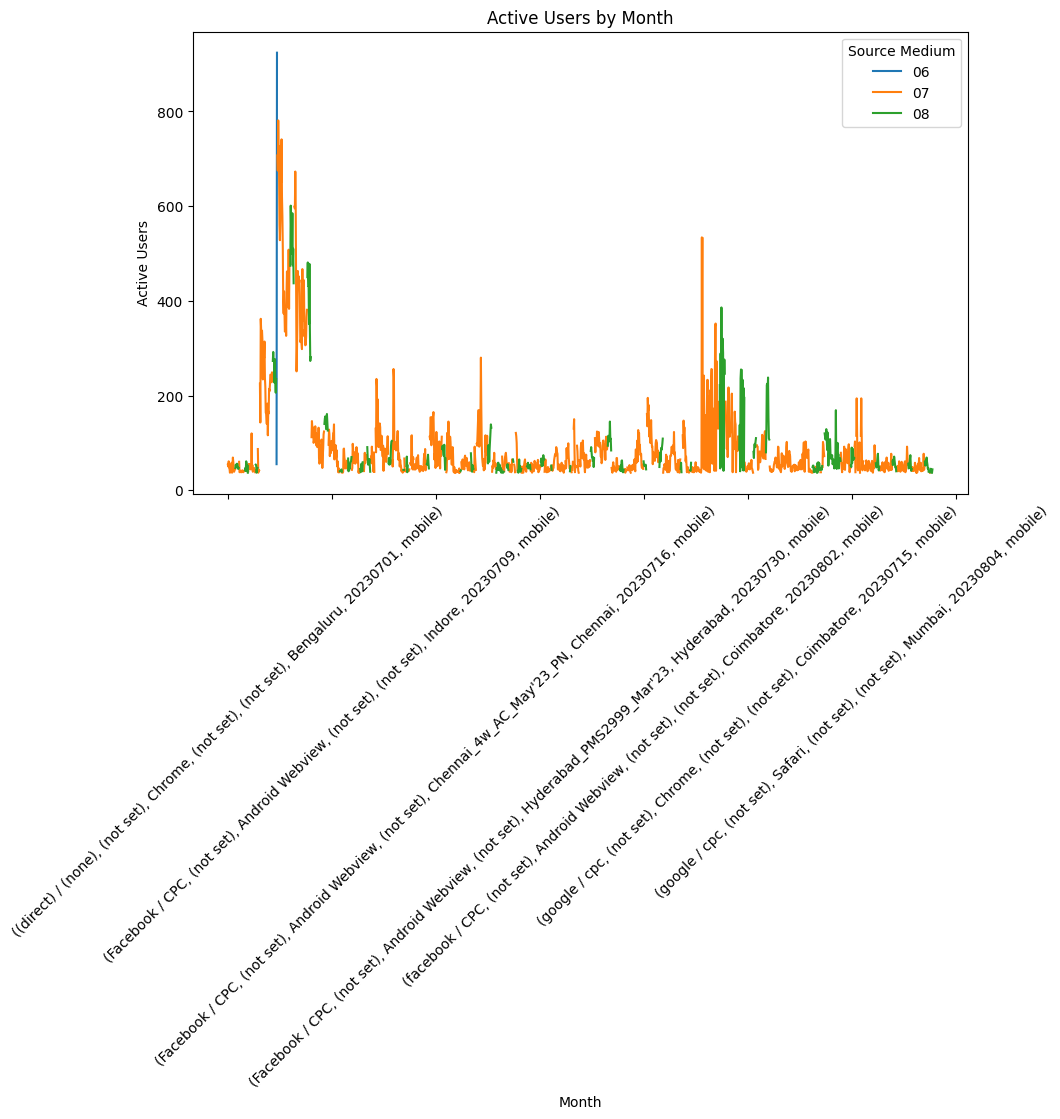

In [100]:
output_df = format_report(request)
output_df['activeUsers'].unstack('month').plot(kind='line', figsize=(10, 6))
plt.title('Active Users by Month')
plt.xlabel('Month')
plt.ylabel('Active Users')
plt.xticks(rotation=45)
plt.legend(title='Source Medium', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_2872\670259967.py:8: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


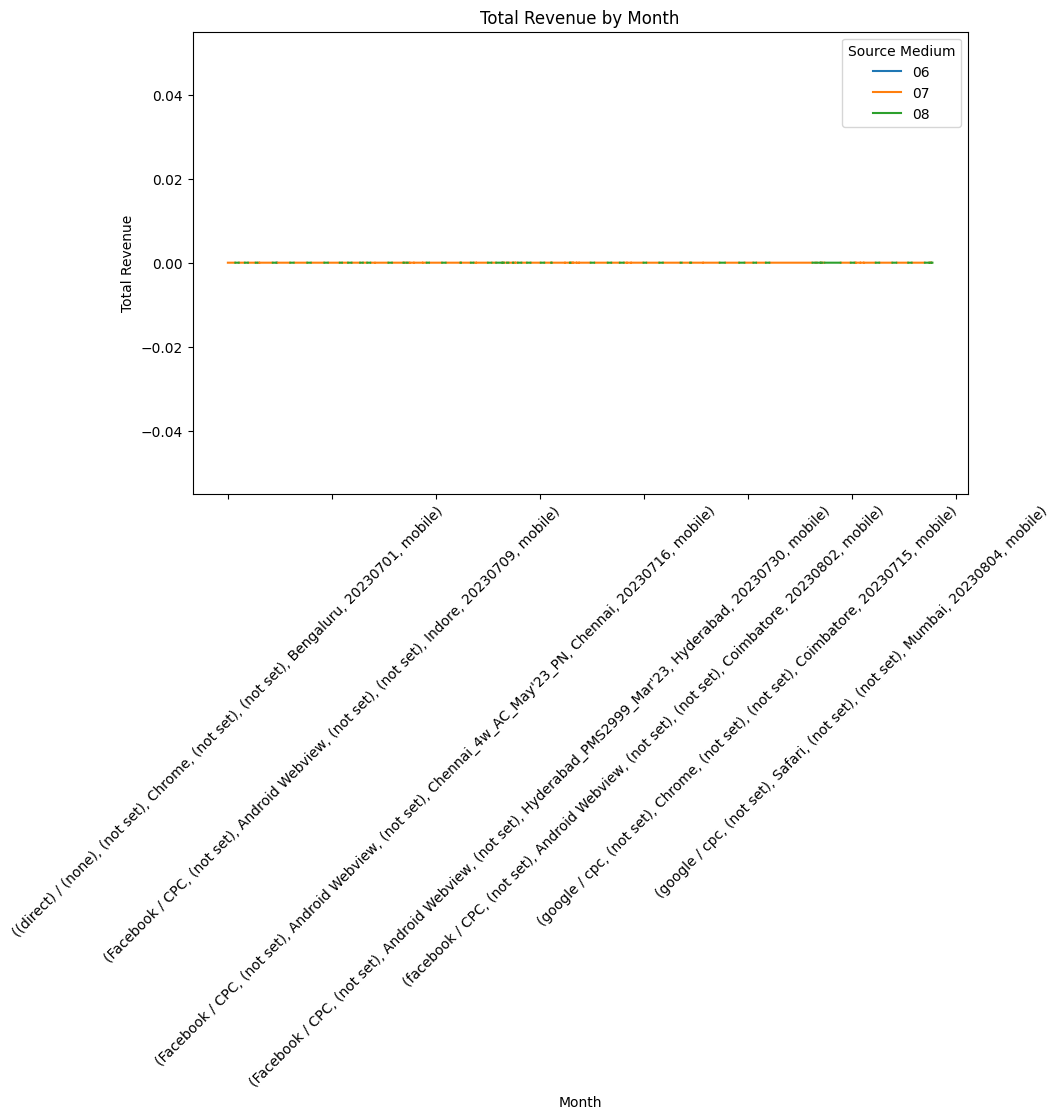

In [101]:
output_df = format_report(request)
output_df['totalRevenue'].unstack('month').plot(kind='line', figsize=(10, 6))
plt.title('Total Revenue by Month')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.legend(title='Source Medium', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()


C:\Users\HP\AppData\Local\Temp\ipykernel_2872\4123166182.py:8: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


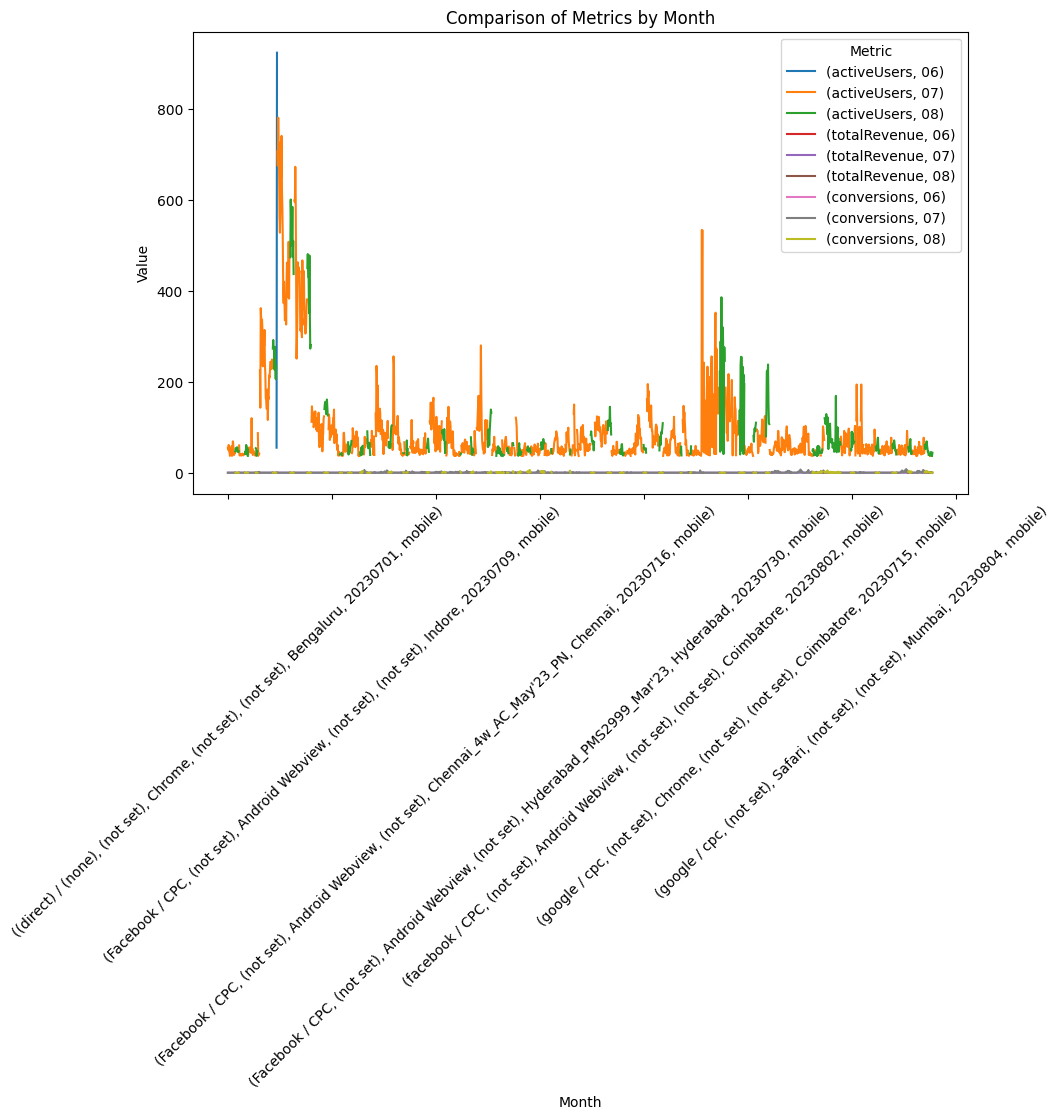

In [102]:
output_df = format_report(request)
output_df[['activeUsers', 'totalRevenue', 'conversions']].unstack('month').plot(kind='line', figsize=(10, 6))
plt.title('Comparison of Metrics by Month')
plt.xlabel('Month')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.legend(title='Metric', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()


C:\Users\HP\AppData\Local\Temp\ipykernel_2872\3443918050.py:33: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  plt.tight_layout()


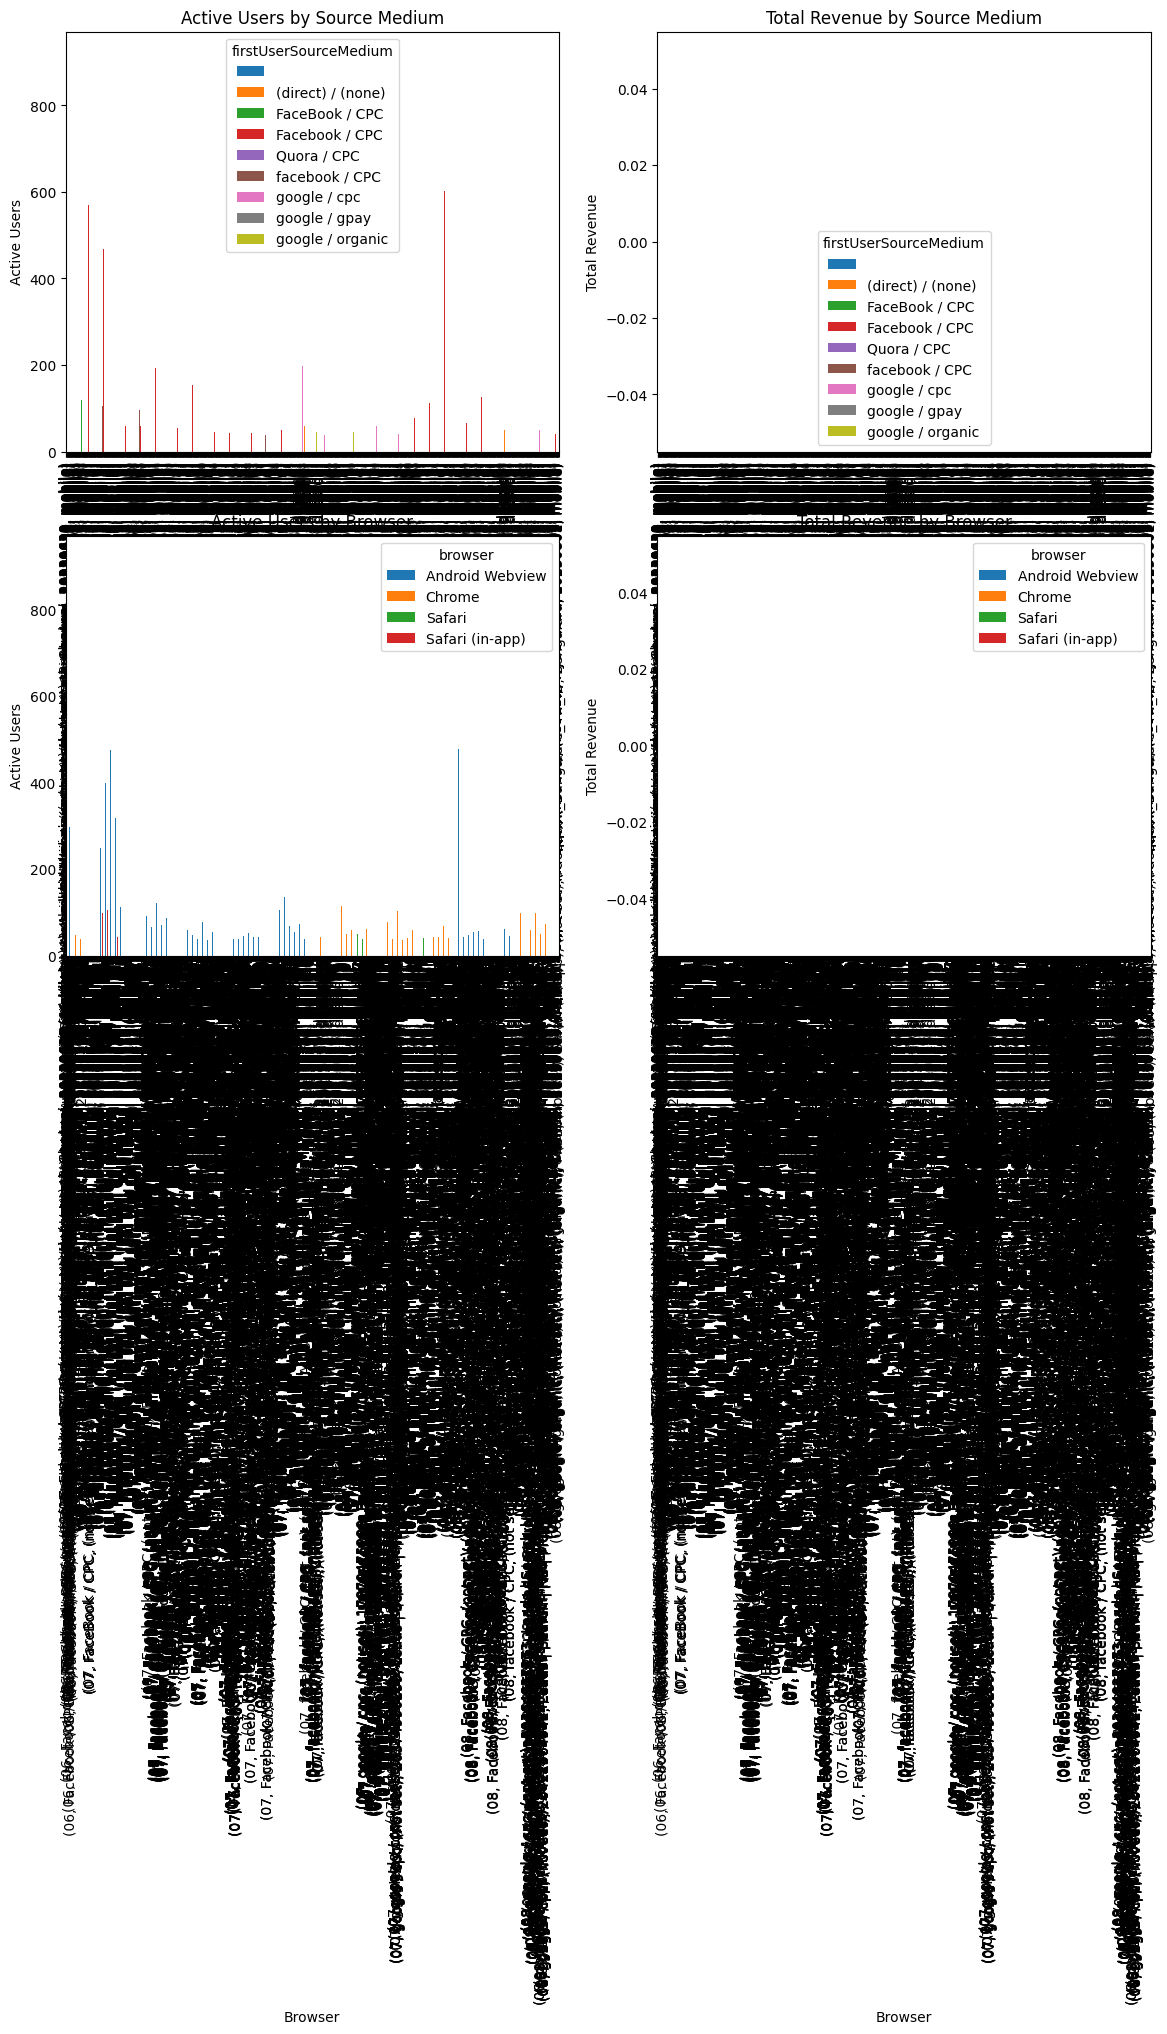

In [106]:
import matplotlib.pyplot as plt
output_df = format_report(request)
# Create subplots with a grid layout (2 rows, 2 columns)
#fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10)
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 12)
)

# Plot 1: Active Users by Source Medium
output_df['activeUsers'].unstack('firstUserSourceMedium').plot(kind='bar', ax=axes[0, 0])
axes[0, 0].set_title('Active Users by Source Medium')
axes[0, 0].set_xlabel('Source Medium')
axes[0, 0].set_ylabel('Active Users')

# Plot 2: Total Revenue by Source Medium
output_df['totalRevenue'].unstack('firstUserSourceMedium').plot(kind='bar', ax=axes[0, 1])
axes[0, 1].set_title('Total Revenue by Source Medium')
axes[0, 1].set_xlabel('Source Medium')
axes[0, 1].set_ylabel('Total Revenue')

# Plot 3: Active Users by Browser
output_df['activeUsers'].unstack('browser').plot(kind='bar', ax=axes[1, 0])
axes[1, 0].set_title('Active Users by Browser')
axes[1, 0].set_xlabel('Browser')
axes[1, 0].set_ylabel('Active Users')

# Plot 4: Total Revenue by Browser
output_df['totalRevenue'].unstack('browser').plot(kind='bar', ax=axes[1, 1])
axes[1, 1].set_title('Total Revenue by Browser')
axes[1, 1].set_xlabel('Browser')
axes[1, 1].set_ylabel('Total Revenue')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()


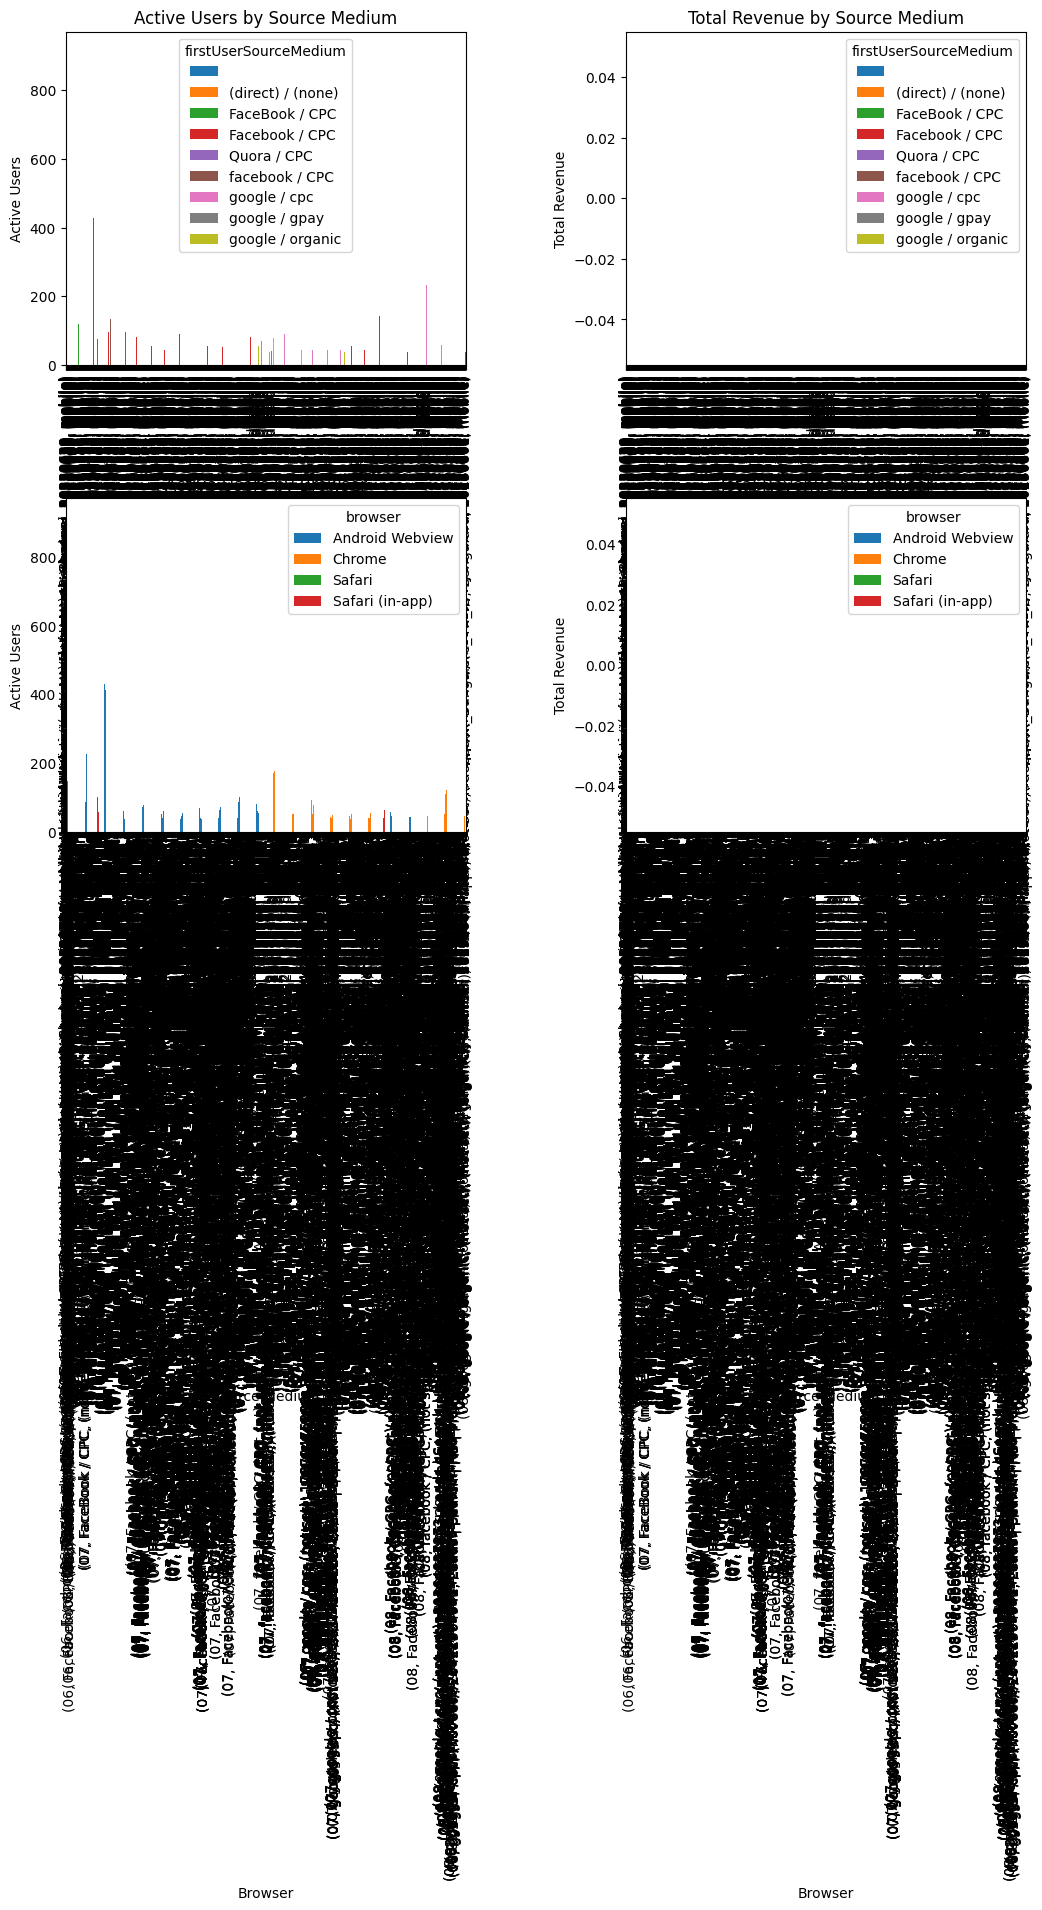

In [107]:
import matplotlib.pyplot as plt
output_df = format_report(request)
# Create subplots with a grid layout (2 rows, 2 columns)
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))

# Plot 1: Active Users by Source Medium
output_df['activeUsers'].unstack('firstUserSourceMedium').plot(kind='bar', ax=axes[0, 0])
axes[0, 0].set_title('Active Users by Source Medium')
axes[0, 0].set_xlabel('Source Medium')
axes[0, 0].set_ylabel('Active Users')

# Plot 2: Total Revenue by Source Medium
output_df['totalRevenue'].unstack('firstUserSourceMedium').plot(kind='bar', ax=axes[0, 1])
axes[0, 1].set_title('Total Revenue by Source Medium')
axes[0, 1].set_xlabel('Source Medium')
axes[0, 1].set_ylabel('Total Revenue')

# Plot 3: Active Users by Browser
output_df['activeUsers'].unstack('browser').plot(kind='bar', ax=axes[1, 0])
axes[1, 0].set_title('Active Users by Browser')
axes[1, 0].set_xlabel('Browser')
axes[1, 0].set_ylabel('Active Users')

# Plot 4: Total Revenue by Browser
output_df['totalRevenue'].unstack('browser').plot(kind='bar', ax=axes[1, 1])
axes[1, 1].set_title('Total Revenue by Browser')
axes[1, 1].set_xlabel('Browser')
axes[1, 1].set_ylabel('Total Revenue')

# Manually adjust layout
plt.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9, wspace=0.4, hspace=0.4)

# Show the plots
plt.show()
